<a href="https://colab.research.google.com/github/animeshmodi/HUGGING-FACE-TRANS/blob/main/DATA_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [12]:
keywords = ["design", "comfort", "others"]

In [13]:
keyword_embeddings = []
for keyword in keywords:
    # Tokenize and encode keyword/phrase
    input_ids = tokenizer.encode(keyword, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids)
    # Extract embedding of [CLS] token
    cls_embedding = outputs.last_hidden_state[:, 0, :]
    keyword_embeddings.append(cls_embedding.squeeze())

In [14]:
keyword_embeddings = torch.stack(keyword_embeddings).numpy()

In [15]:
kmeans = KMeans(n_clusters=len(keywords), random_state=42)
clusters = kmeans.fit_predict(keyword_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
clustering_df = pd.DataFrame({
    'Keyword': keywords,
    'Cluster': clusters
})

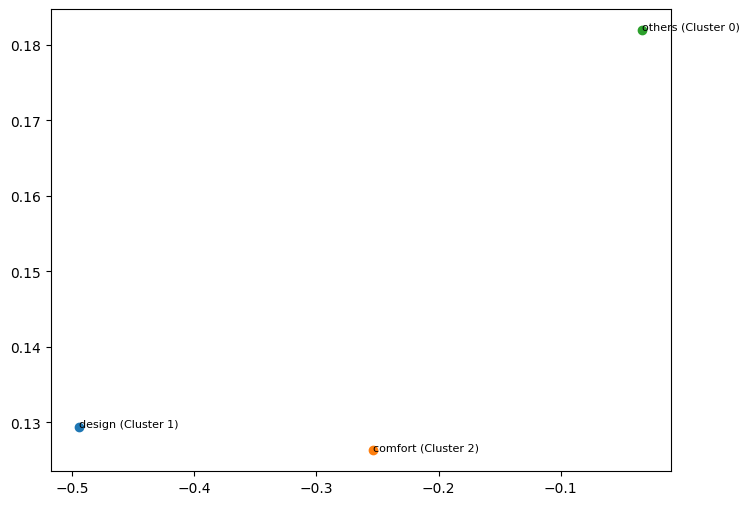

In [19]:
plt.figure(figsize=(8, 6))
for i in range(len(keywords)):
    plt.scatter(keyword_embeddings[i, 0], keyword_embeddings[i, 1], label=f'Cluster {clusters[i]}: {keywords[i]}')
    plt.text(keyword_embeddings[i, 0], keyword_embeddings[i, 1], f'{keywords[i]} (Cluster {clusters[i]})', fontsize=8)


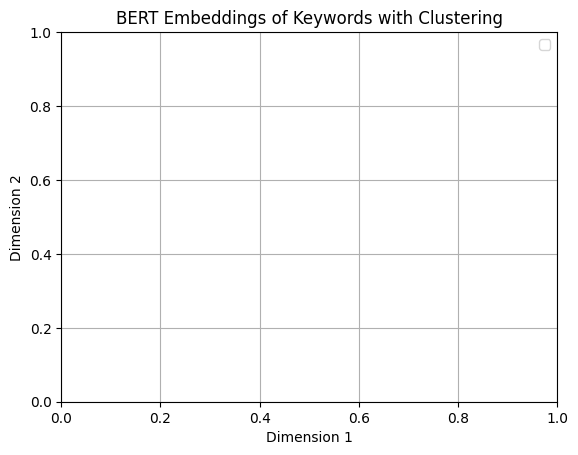

   Keyword  Cluster
0   design        1
1  comfort        2
2   others        0


In [20]:
plt.title('BERT Embeddings of Keywords with Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

print(clustering_df)